Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import duckdb as db
import matplotlib.pyplot as plt
import scipy.stats as stats

Create functions for descriptive Statistics


In [11]:
def measure_of_central_tendency(x):
    print("Mean, Median, and Mode are respectively:")
    return x.mean(), x.median(), 3*x.median()-2*x.mean()

def positional_statistics(x):
    print("Min, 10th Decile, IQR1, Median, IQR3, 90th Decile, and Max. are respectively:")
    return x.min(), round(x.quantile(.10),2), round(x.quantile(.25),2), round(x.quantile(.50),2), 
    round(x.quantile(.75),2), round(x.quantile(.90),2), x.max()

def measure_of_dispersion(x):
    print("Range, Inter Quartile Range, variance, and Std. devations are respectively:")
    return x.max()-x.min(), round((x.quantile(.75)-x.quantile(.25)),2), round(x.var(),2), round(x.std(),2)

def measure_of_shape(x):
    print("Skewness and Kurtosis coefficients are:")
    return round(x.skew(),2), round(x.kurt(),2)

#### Import the Early Childhood data

The Early Childhood questionnaire (variable name prefix ECQ) section of the Sample Person Questionnaire provides personal interview data for children, including the age of the biological mother when the child participant was born, smoking habits of the mother while she was pregnant with the participant, birth weight and the proxy’s assessment of the participant’s current weight.

In [2]:
df_ECQ = pd.read_sas(
    '/Users/soumyadeepray/Library/Mobile Documents/com~apple~CloudDocs/Documents/Research_Project-Nutrition_Sciences/NHANES/data/P_ECQ.XPT')

In [45]:
df_ECQ

,SEQN,ECD010,ECQ020,ECD070A,ECD070B,ECQ080,ECQ090,WHQ030E,MCQ080E,ECQ150
0,109263.0,31.0,2.0,7.0,6.000000e+00,NaN,NaN,3.0,2.0,NaN
1,109264.0,19.0,2.0,6.0,5.397605e-79,NaN,NaN,2.0,2.0,NaN
2,109265.0,9999.0,9.0,6.0,4.000000e+00,NaN,NaN,2.0,2.0,NaN
3,109269.0,20.0,2.0,7.0,5.000000e+00,NaN,NaN,3.0,1.0,2.0
4,109270.0,24.0,2.0,6.0,4.000000e+00,NaN,NaN,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...
5360,124804.0,34.0,2.0,8.0,6.000000e+00,NaN,NaN,NaN,NaN,NaN
5361,124806.0,23.0,2.0,8.0,5.397605e-79,NaN,NaN,3.0,2.0,NaN
5362,124816.0,27.0,2.0,6.0,1.300000e+01,NaN,NaN,NaN,NaN,NaN
5363,124819.0,26.0,2.0,7.0,1.000000e+00,NaN,NaN,3.0,2.0,NaN


Check for null values in the `ECQ150` (Help your child control weight) column

In [3]:
df_ECQ['ECQ150'].isnull().sum()

4818

There are 4818 null values for the ECQ150 column. Therefore, the missing values are coded as 9 which means "Don't Know"

In [4]:
df_ECQ['ECQ150'] = df_ECQ['ECQ150'].fillna(9.0)
df_ECQ['MCQ080E'] = df_ECQ['MCQ080E'].fillna(9.0)
df_ECQ['WHQ030E'] = df_ECQ['WHQ030E'].fillna(9.0)

Map the weight category number to weight category description

In [5]:
df_ECQ['WHQ030E'] = df_ECQ['WHQ030E'].map({1.0 : 'Overweight',
                                    2.0 : 'Underweight',
                                    3.0 : 'About the right weight',
                                    9.0 : 'Dont know'})

Convert the datatype of `MCQ080E` and `ECQ150` from float64 to category.

In [8]:
df_ECQ['MCQ080E'] = df_ECQ['MCQ080E'].astype('category')
df_ECQ['ECQ150'] = df_ECQ['ECQ150'].astype('category')

`describe` keyword is used to check the count of the total number of rows, number of unique values, most frequent category, total number of rows of the most frequent category in the respective column of the dataframe. 

In [9]:
df_ECQ['WHQ030E'].describe()

count                       5365
unique                         4
top       About the right weight
freq                        3549
Name: WHQ030E, dtype: object

In [51]:
df_ECQ['MCQ080E'].describe()

count     5365.0
unique       3.0
top          2.0
freq      3835.0
Name: MCQ080E, dtype: float64

In [52]:
df_ECQ['ECQ150'].describe()

count     5365.0
unique       3.0
top          9.0
freq      4818.0
Name: ECQ150, dtype: float64

Histogram chart is plotted to show the Child's weight opinion (WHQ030E) versus its frequency

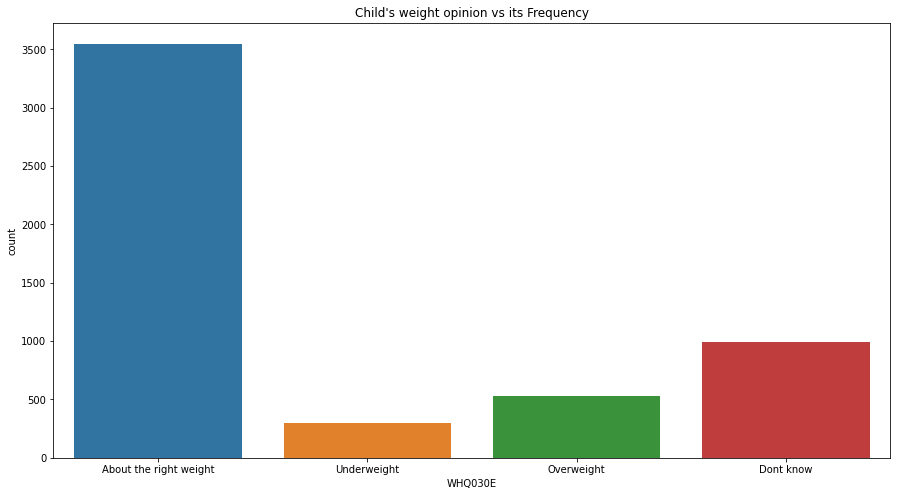

In [53]:
plt.figure(figsize=(15, 8))
hist = sns.countplot(data=df_ECQ, x="WHQ030E").set_title("Child's weight opinion vs its Frequency")
plt.show()

Line chart is plotted to show the distribution of child weight.

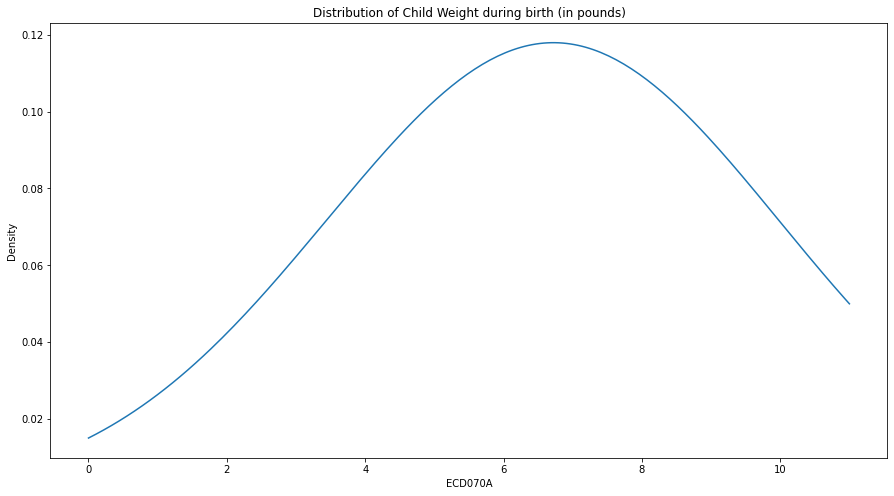

In [54]:
plt.figure(figsize=(15, 8))
hist = sns.kdeplot(data=df_ECQ, x="ECD070A", clip=(0.0, 11.0), bw_adjust=.01).set_title("Distribution of Child Weight during birth (in pounds)")
plt.show()

With the use of descriptive statistics, we find the mean, median, mode for the `Weight at Birth` (ECD070A) column.

We also find the minimum, 10th Decile, IQR1, Median, IQR3, 90th Decile, and Maximum.

Range, Inter Quartile Range, variance, Std. devations, Skewness and Kurtosis coefficients are also calculated.

Summary of Descriptive Statistics:
----------------------------------
Mean, Median, and Mode are respectively:
(295.4829386537386, 7.0, -569.9658773074772)
Min, 10th Decile, IQR1, Median, IQR3, 90th Decile, and Max. are respectively:
(3.0, 5.0, 6.0, 7.0)
Range, Inter Quartile Range, variance, and Std. devations are respectively:
(9996.0, 2.0, 2802853.06, 1674.17)
Skewness and Kurtosis coefficients are:
(5.63, 29.66)


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


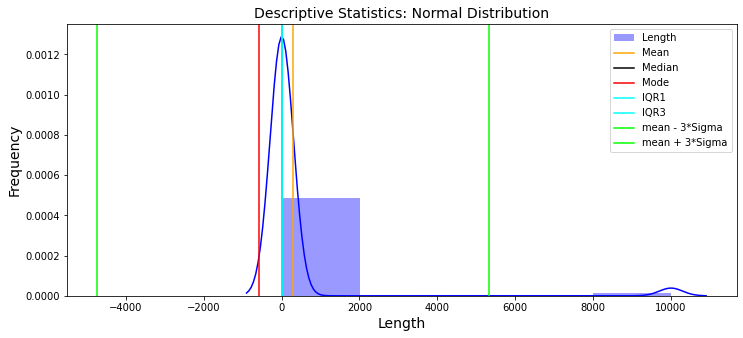

In [12]:
print("Summary of Descriptive Statistics:")
print("----------------------------------")
print(measure_of_central_tendency(df_ECQ.ECD070A))
print(positional_statistics(df_ECQ.ECD070A))
print(measure_of_dispersion(df_ECQ.ECD070A))
print(measure_of_shape(df_ECQ.ECD070A))

# Plot the graph
plt.figure(figsize=(12,5))
sns.distplot(df_ECQ.ECD070A, bins=5, hist=True, kde=True, label = 'Length', color = "blue")
plt.axvline(df_ECQ.ECD070A.mean(),color='orange',label='Mean')
plt.axvline(df_ECQ.ECD070A.median(),color='black',label='Median')
plt.axvline(3*df_ECQ.ECD070A.median()-2*df_ECQ.ECD070A.mean(),color='red',label='Mode')
plt.axvline(df_ECQ.ECD070A.quantile(0.25),color='cyan',label='IQR1')
plt.axvline(df_ECQ.ECD070A.quantile(0.75),color='cyan',label='IQR3')
plt.axvline(df_ECQ.ECD070A.mean() - 3*df_ECQ.ECD070A.std(),color='lime',label= "mean - 3*Sigma")
plt.axvline(df_ECQ.ECD070A.mean() + 3*df_ECQ.ECD070A.std(),color='lime',label= "mean + 3*Sigma")
plt.title("Descriptive Statistics: Normal Distribution", fontsize =14)
plt.xlabel('Length', fontsize =14)
plt.ylabel('Frequency', fontsize =14)
plt.legend()
plt.show()

Check the frequency of each of the weight in pounds for the `Underweight` category.

In [55]:
q_1 = db.sql("select ECD070A as Weight_in_pounds, count(ECD070A) as Frequency from df_ECQ where WHQ030E = 'Underweight' and ECD070A <> 9999.0 group by ECD070A").df()
q_1

,Weight_in_pounds,Frequency
0,6.0,96
1,5.0,32
2,4.0,17
3,7.0,83
4,9.0,6
5,3.0,16
6,8.0,31
7,11.0,1
8,10.0,1


Histogram chart to distribution of the `Underweight` category

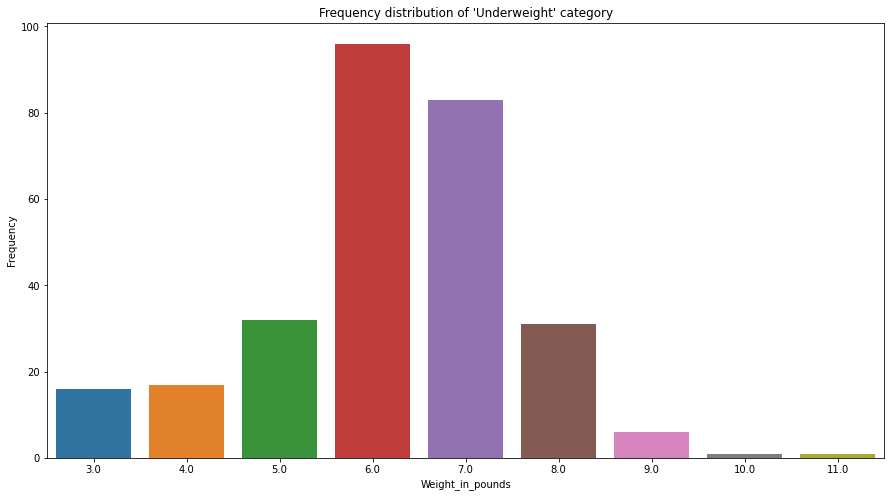

In [214]:
plt.figure(figsize=(15, 8))
sns.barplot(data=q_1, x='Weight_in_pounds', y='Frequency')
plt.title("Frequency distribution of 'Underweight' category")
plt.show()

Check the frequency of each of the weight in pounds for the `Overweight` category.

In [57]:
q_2 = db.sql("select ECD070A as Weight_in_pounds, count(ECD070A) as Frequency from df_ECQ where WHQ030E = 'Overweight' and ECD070A <> 9999.0 group by ECD070A").df()

Histogram chart to distribution of the `Overweight` category

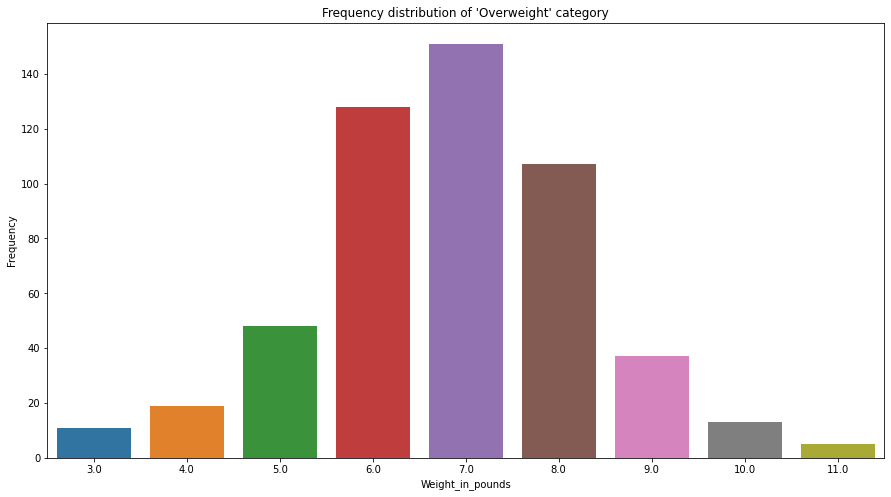

In [58]:
plt.figure(figsize=(15, 8))
sns.barplot(data=q_2, x='Weight_in_pounds', y='Frequency')
plt.title("Frequency distribution of 'Overweight' category")
plt.show()

#### Import the Body Measures data

In [124]:
df_BMX = pd.read_sas(
    '/Users/soumyadeepray/Library/Mobile Documents/com~apple~CloudDocs/Documents/Research_Project-Nutrition_Sciences/NHANES/data/P_BMX.XPT')
df_BMX

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
0,109263.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,1.0,42.2,NaN,NaN,NaN,NaN,NaN,154.7,NaN,...,36.3,NaN,33.8,NaN,22.7,NaN,63.8,NaN,85.0,NaN
2,109265.0,1.0,12.0,NaN,91.6,NaN,NaN,NaN,89.3,NaN,...,NaN,NaN,18.6,NaN,14.8,NaN,41.2,NaN,NaN,NaN
3,109266.0,1.0,97.1,NaN,NaN,NaN,NaN,NaN,160.2,NaN,...,40.8,NaN,34.7,NaN,35.8,NaN,117.9,NaN,126.1,NaN
4,109269.0,3.0,13.6,NaN,90.9,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14295,124818.0,1.0,108.8,NaN,NaN,NaN,NaN,NaN,168.7,3.0,...,45.6,NaN,38.6,NaN,33.6,NaN,114.7,NaN,118.0,NaN
14296,124819.0,1.0,15.4,NaN,94.9,NaN,NaN,NaN,93.7,NaN,...,NaN,NaN,17.5,NaN,15.8,NaN,48.4,NaN,NaN,NaN
14297,124820.0,1.0,22.9,NaN,NaN,NaN,NaN,NaN,123.3,NaN,...,NaN,NaN,24.3,NaN,18.5,NaN,57.5,NaN,NaN,NaN
14298,124821.0,1.0,79.5,NaN,NaN,NaN,NaN,NaN,176.4,NaN,...,42.0,NaN,39.5,NaN,31.4,NaN,97.1,NaN,99.8,NaN


#### Import the Demographic data

In [100]:
df_demo = pd.read_sas(
    '/Users/soumyadeepray/Library/Mobile Documents/com~apple~CloudDocs/Documents/Research_Project-Nutrition_Sciences/NHANES/data/P_DEMO.XPT')
df_demo

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
0,109263.0,66.0,2.0,1.0,2.0,NaN,5.0,6.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,7891.762435,8.951816e+03,3.0,156.0,4.66
1,109264.0,66.0,2.0,2.0,13.0,NaN,1.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,1.0,11689.747264,1.227116e+04,1.0,155.0,0.83
2,109265.0,66.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,16273.825939,1.665876e+04,1.0,157.0,3.06
3,109266.0,66.0,2.0,2.0,29.0,NaN,5.0,6.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,7825.646112,8.154968e+03,2.0,168.0,5.00
4,109267.0,66.0,1.0,2.0,21.0,NaN,2.0,2.0,NaN,2.0,...,2.0,NaN,NaN,NaN,NaN,26379.991724,5.397605e-79,1.0,156.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818.0,66.0,2.0,1.0,40.0,NaN,4.0,4.0,1.0,1.0,...,2.0,1.0,2.0,2.0,1.0,21586.596728,2.166689e+04,1.0,166.0,3.82
15556,124819.0,66.0,2.0,1.0,2.0,NaN,4.0,4.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,1664.919253,1.838170e+03,2.0,171.0,0.07
15557,124820.0,66.0,2.0,2.0,7.0,NaN,3.0,3.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,14819.783161,1.649781e+04,1.0,157.0,1.22
15558,124821.0,66.0,2.0,1.0,63.0,NaN,4.0,4.0,1.0,1.0,...,2.0,1.0,2.0,2.0,1.0,4666.817952,4.853430e+03,1.0,158.0,3.71


#### Import the Weight History - Youth data

In [163]:
# Weight history youth
df_WHQMEC = pd.read_sas(
    '/Users/soumyadeepray/Library/Mobile Documents/com~apple~CloudDocs/Documents/Research_Project-Nutrition_Sciences/NHANES/data/P_WHQMEC.XPT')
df_WHQMEC

,SEQN,WHQ030M,WHQ500,WHQ520
0,109264.0,2.0,4.0,1.0
1,109270.0,1.0,1.0,2.0
2,109277.0,3.0,4.0,1.0
3,109287.0,1.0,1.0,2.0
4,109296.0,3.0,1.0,2.0
...,...,...,...,...
2206,124766.0,3.0,4.0,1.0
2207,124767.0,1.0,1.0,2.0
2208,124768.0,3.0,3.0,1.0
2209,124776.0,3.0,3.0,1.0


Join the Body Measures dataframe and the Early Childhood dataframe on the `SEQN` column using a left join.

In [117]:
df_merged = pd.merge(df_BMX, df_ECQ, on='SEQN', how='left')
df_merged.shape

(14300, 31)

Join the Demographic variables dataframe with the merged dataframe on the `SEQN` column using a left join.

In [118]:
df_merged = pd.merge(df_merged, df_demo, on='SEQN', how='left')

Check the number of unique `SEQN` numbers in the Body Measures dataframe.

In [119]:
df_BMX.SEQN.value_counts().sum()

14300

Check the number of unique `SEQN` numbers in the Early Childhood dataframe.

In [120]:
df_ECQ.SEQN.value_counts().sum()

5365

Write a SQL query to obtain all the records that have non-null values of `WHQ030E` and `BMXBMI`.

In [165]:
q_3 = db.sql("select SEQN, RIDAGEYR, RIAGENDR, RIDRETH3, BMXWT, BMXBMI, BMXRECUM, BMXHT,  BMDBMIC, WHQ030E as Child_Weight_Perception from df_merged where WHQ030E is not null and BMXBMI is not null").df()

In [166]:
q_3['RIDAGEYR'].describe()

count    3873.000000
mean        8.257681
std         3.956531
min         2.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        15.000000
Name: RIDAGEYR, dtype: float64

Violin plot to show the distribution of Child actual BMI of different Child weight perception categories

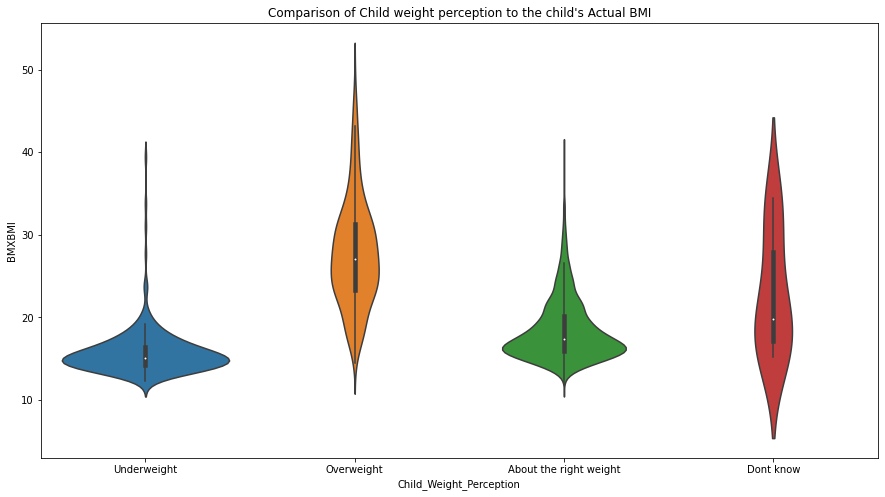

In [167]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=q_3, x='Child_Weight_Perception', y='BMXBMI')
plt.title("Comparison of Child weight perception to the child's Actual BMI")
plt.show()

Map the weight category number to weight category description

In [168]:
q_3['BMDBMIC'] = q_3['BMDBMIC'].map({1.0 : 'Underweight',
                                    2.0 : 'Normal Weight',
                                    3.0 : 'Overweight',
                                    4.0 : 'Obese'})

Box plot to show the distribution of Child actual BMI of different BMI categories

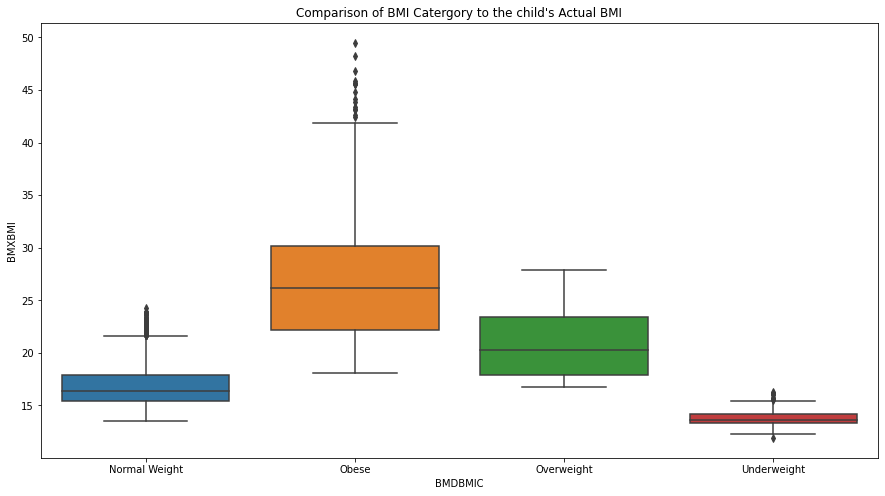

In [169]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=q_3, x='BMDBMIC', y='BMXBMI')
plt.title("Comparison of BMI Catergory to the child's Actual BMI")
plt.show()

#### BMI Calculation for respondents between 0 - 15 years

We create a new variable for height by combining the recumbent length (BMXRECUM) and for standing height (BMXHT). Then we convert unit the height variable from cm to meter and then to meter^2.

Then we divide the weight (BMXWT) by length or height in meter^2 to get BMI.

In [170]:
q_3['Height'] = q_3[['BMXRECUM','BMXHT']].mean(axis = 1)

In [171]:
q_3['Height_squared'] = q_3['Height']**2/10000

In [172]:
q_3['Height'].isnull().sum()
q_3

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3,BMXWT,BMXBMI,BMXRECUM,BMXHT,BMDBMIC,Child_Weight_Perception,Height,Height_squared
0,109264.0,13.0,2.0,1.0,42.2,17.6,NaN,154.7,Normal Weight,Underweight,154.70,2.393209
1,109265.0,2.0,1.0,3.0,12.0,15.0,91.6,89.3,Normal Weight,Underweight,90.45,0.818120
2,109270.0,11.0,2.0,4.0,75.3,30.9,NaN,156.0,Obese,Overweight,156.00,2.433600
3,109275.0,6.0,1.0,3.0,20.9,14.4,NaN,120.4,Normal Weight,About the right weight,120.40,1.449616
4,109277.0,12.0,2.0,1.0,48.7,18.6,NaN,162.0,Normal Weight,About the right weight,162.00,2.624400
...,...,...,...,...,...,...,...,...,...,...,...,...
3868,124790.0,2.0,1.0,7.0,18.9,21.2,97.0,94.5,Obese,About the right weight,95.75,0.916806
3869,124797.0,9.0,1.0,1.0,21.7,15.8,NaN,117.2,Normal Weight,Underweight,117.20,1.373584
3870,124806.0,4.0,2.0,4.0,15.6,16.0,NaN,98.8,Normal Weight,About the right weight,98.80,0.976144
3871,124819.0,2.0,1.0,4.0,15.4,17.5,94.9,93.7,Overweight,About the right weight,94.30,0.889249


In [173]:
q_3['BMI_calculated'] = q_3['BMXWT']/q_3['Height_squared']
q_3

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3,BMXWT,BMXBMI,BMXRECUM,BMXHT,BMDBMIC,Child_Weight_Perception,Height,Height_squared,BMI_calculated
0,109264.0,13.0,2.0,1.0,42.2,17.6,NaN,154.7,Normal Weight,Underweight,154.70,2.393209,17.633228
1,109265.0,2.0,1.0,3.0,12.0,15.0,91.6,89.3,Normal Weight,Underweight,90.45,0.818120,14.667770
2,109270.0,11.0,2.0,4.0,75.3,30.9,NaN,156.0,Obese,Overweight,156.00,2.433600,30.941815
3,109275.0,6.0,1.0,3.0,20.9,14.4,NaN,120.4,Normal Weight,About the right weight,120.40,1.449616,14.417611
4,109277.0,12.0,2.0,1.0,48.7,18.6,NaN,162.0,Normal Weight,About the right weight,162.00,2.624400,18.556622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,124790.0,2.0,1.0,7.0,18.9,21.2,97.0,94.5,Obese,About the right weight,95.75,0.916806,20.615043
3869,124797.0,9.0,1.0,1.0,21.7,15.8,NaN,117.2,Normal Weight,Underweight,117.20,1.373584,15.798087
3870,124806.0,4.0,2.0,4.0,15.6,16.0,NaN,98.8,Normal Weight,About the right weight,98.80,0.976144,15.981249
3871,124819.0,2.0,1.0,4.0,15.4,17.5,94.9,93.7,Overweight,About the right weight,94.30,0.889249,17.317984


In [174]:
q_3['BMI_calculated'].describe()

count    3873.000000
mean       19.417864
std         5.262050
min        11.870616
25%        15.846710
50%        17.600982
75%        21.589784
max        49.456837
Name: BMI_calculated, dtype: float64

Create a new column `BMI_Category` that will categorise the calculate BMI values into `Underweight`, `About the right weight` and `Overweight`.

In [175]:
q_3['BMI_Category'] = q_3['BMI_calculated'].map( lambda x: 'Underweight' 
                                                if x < 18.5 else 'About the right weight' 
                                                if x >= 18.5 and x < 25 else 'Overweight')
q_3

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3,BMXWT,BMXBMI,BMXRECUM,BMXHT,BMDBMIC,Child_Weight_Perception,Height,Height_squared,BMI_calculated,BMI_Category
0,109264.0,13.0,2.0,1.0,42.2,17.6,NaN,154.7,Normal Weight,Underweight,154.70,2.393209,17.633228,Underweight
1,109265.0,2.0,1.0,3.0,12.0,15.0,91.6,89.3,Normal Weight,Underweight,90.45,0.818120,14.667770,Underweight
2,109270.0,11.0,2.0,4.0,75.3,30.9,NaN,156.0,Obese,Overweight,156.00,2.433600,30.941815,Overweight
3,109275.0,6.0,1.0,3.0,20.9,14.4,NaN,120.4,Normal Weight,About the right weight,120.40,1.449616,14.417611,Underweight
4,109277.0,12.0,2.0,1.0,48.7,18.6,NaN,162.0,Normal Weight,About the right weight,162.00,2.624400,18.556622,About the right weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,124790.0,2.0,1.0,7.0,18.9,21.2,97.0,94.5,Obese,About the right weight,95.75,0.916806,20.615043,About the right weight
3869,124797.0,9.0,1.0,1.0,21.7,15.8,NaN,117.2,Normal Weight,Underweight,117.20,1.373584,15.798087,Underweight
3870,124806.0,4.0,2.0,4.0,15.6,16.0,NaN,98.8,Normal Weight,About the right weight,98.80,0.976144,15.981249,Underweight
3871,124819.0,2.0,1.0,4.0,15.4,17.5,94.9,93.7,Overweight,About the right weight,94.30,0.889249,17.317984,Underweight


Create a new column `Matched_or_not` that will classify whether the initial BMI category matches with the calculated BMI category.

In [176]:
q_3['Matched_or_not'] = np.where(q_3['Child_Weight_Perception'] == q_3['BMI_Category'] , 0, 
                        np.where((q_3['Child_Weight_Perception'] == 'About the right weight') & (q_3['BMI_Category'] == 'Underweight'),1,
                        np.where((q_3['Child_Weight_Perception'] == 'Underweight') & (q_3['BMI_Category'] == 'About the right weight'),2,
                        np.where((q_3['Child_Weight_Perception'] == 'Overweight') & (q_3['BMI_Category'] == 'About the right weight'),3,
                        np.where((q_3['Child_Weight_Perception'] == 'About the right weight') & (q_3['BMI_Category'] == 'Overweight'),4,5)))))
q_3

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3,BMXWT,BMXBMI,BMXRECUM,BMXHT,BMDBMIC,Child_Weight_Perception,Height,Height_squared,BMI_calculated,BMI_Category,Matched_or_not
0,109264.0,13.0,2.0,1.0,42.2,17.6,NaN,154.7,Normal Weight,Underweight,154.70,2.393209,17.633228,Underweight,0
1,109265.0,2.0,1.0,3.0,12.0,15.0,91.6,89.3,Normal Weight,Underweight,90.45,0.818120,14.667770,Underweight,0
2,109270.0,11.0,2.0,4.0,75.3,30.9,NaN,156.0,Obese,Overweight,156.00,2.433600,30.941815,Overweight,0
3,109275.0,6.0,1.0,3.0,20.9,14.4,NaN,120.4,Normal Weight,About the right weight,120.40,1.449616,14.417611,Underweight,1
4,109277.0,12.0,2.0,1.0,48.7,18.6,NaN,162.0,Normal Weight,About the right weight,162.00,2.624400,18.556622,About the right weight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,124790.0,2.0,1.0,7.0,18.9,21.2,97.0,94.5,Obese,About the right weight,95.75,0.916806,20.615043,About the right weight,0
3869,124797.0,9.0,1.0,1.0,21.7,15.8,NaN,117.2,Normal Weight,Underweight,117.20,1.373584,15.798087,Underweight,0
3870,124806.0,4.0,2.0,4.0,15.6,16.0,NaN,98.8,Normal Weight,About the right weight,98.80,0.976144,15.981249,Underweight,1
3871,124819.0,2.0,1.0,4.0,15.4,17.5,94.9,93.7,Overweight,About the right weight,94.30,0.889249,17.317984,Underweight,1


Show the frequency of different categories of `Matched_or_not` column

In [177]:
q_3['Matched_or_not'].value_counts()

1    1956
0    1500
4     199
3     152
5      46
2      20
Name: Matched_or_not, dtype: int64

Joining the weight history youth data on the `SEQN` column by left join

In [178]:
q_3_merged = pd.merge(q_3, df_WHQMEC, on='SEQN', how='left')
q_3_merged

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3,BMXWT,BMXBMI,BMXRECUM,BMXHT,BMDBMIC,Child_Weight_Perception,Height,Height_squared,BMI_calculated,BMI_Category,Matched_or_not,WHQ030M,WHQ500,WHQ520
0,109264.0,13.0,2.0,1.0,42.2,17.6,NaN,154.7,Normal Weight,Underweight,154.70,2.393209,17.633228,Underweight,0,2.0,4.0,1.0
1,109265.0,2.0,1.0,3.0,12.0,15.0,91.6,89.3,Normal Weight,Underweight,90.45,0.818120,14.667770,Underweight,0,NaN,NaN,NaN
2,109270.0,11.0,2.0,4.0,75.3,30.9,NaN,156.0,Obese,Overweight,156.00,2.433600,30.941815,Overweight,0,1.0,1.0,2.0
3,109275.0,6.0,1.0,3.0,20.9,14.4,NaN,120.4,Normal Weight,About the right weight,120.40,1.449616,14.417611,Underweight,1,NaN,NaN,NaN
4,109277.0,12.0,2.0,1.0,48.7,18.6,NaN,162.0,Normal Weight,About the right weight,162.00,2.624400,18.556622,About the right weight,0,3.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,124790.0,2.0,1.0,7.0,18.9,21.2,97.0,94.5,Obese,About the right weight,95.75,0.916806,20.615043,About the right weight,0,NaN,NaN,NaN
3869,124797.0,9.0,1.0,1.0,21.7,15.8,NaN,117.2,Normal Weight,Underweight,117.20,1.373584,15.798087,Underweight,0,3.0,3.0,2.0
3870,124806.0,4.0,2.0,4.0,15.6,16.0,NaN,98.8,Normal Weight,About the right weight,98.80,0.976144,15.981249,Underweight,1,NaN,NaN,NaN
3871,124819.0,2.0,1.0,4.0,15.4,17.5,94.9,93.7,Overweight,About the right weight,94.30,0.889249,17.317984,Underweight,1,NaN,NaN,NaN


In [179]:
q_3_merged['WHQ030M'].value_counts()

3.0    1573
1.0     390
2.0     131
9.0       5
7.0       2
Name: WHQ030M, dtype: int64

Missing values of the WHQ030M indicate that those respondents are below 8 years of age.

In [184]:
q_3_merged['WHQ030M'].isnull().sum()

1772

Removing the null values from WHQ030M


In [185]:
q_3_merged = q_3_merged[q_3_merged[['WHQ030M']].notnull().all(1)]

the age of respondents is between 8-15 years

In [186]:
q_3_merged['RIDAGEYR'].value_counts()

10.0    305
11.0    296
9.0     296
8.0     294
14.0    256
13.0    228
12.0    221
15.0    205
Name: RIDAGEYR, dtype: int64

Dropping the rows having null values for the WHQ030M column

In [195]:
q_3_merged.drop(q_3_merged[(q_3_merged['WHQ030M']== 9.0) | (q_3_merged['WHQ030M']== 7.0)].index, inplace=True)

/var/folders/jk/45pfmj415lb9l0__2lq4xmr40000gn/T/ipykernel_78153/1870604907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_3_merged.drop(q_3_merged[(q_3_merged['WHQ030M']== 9.0) | (q_3_merged['WHQ030M']== 7.0)].index, inplace=True)


Dropping the rows having null values for the Child_Weight_Perception column

In [206]:
q_3_merged.drop(q_3_merged[(q_3_merged['Child_Weight_Perception']== 'Dont know')].index, inplace=True)

/var/folders/jk/45pfmj415lb9l0__2lq4xmr40000gn/T/ipykernel_78153/1127237758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_3_merged.drop(q_3_merged[(q_3_merged['Child_Weight_Perception']== 'Dont know')].index, inplace=True)


Encoding WHQ030M with description

In [196]:
q_3_merged['WHQ030M'] = q_3_merged['WHQ030M'].map({1.0 : 'Overweight',
                                    2.0 : 'Underweight',
                                    3.0 : 'About the right weight'})

/var/folders/jk/45pfmj415lb9l0__2lq4xmr40000gn/T/ipykernel_78153/2699279061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_3_merged['WHQ030M'] = q_3_merged['WHQ030M'].map({1.0 : 'Overweight',


In [207]:
q_3_merged

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3,BMXWT,BMXBMI,BMXRECUM,BMXHT,BMDBMIC,Child_Weight_Perception,Height,Height_squared,BMI_calculated,BMI_Category,Matched_or_not,WHQ030M,WHQ500,WHQ520
0,109264.0,13.0,2.0,1.0,42.2,17.6,NaN,154.7,Normal Weight,Underweight,154.7,2.393209,17.633228,Underweight,0,Underweight,4.0,1.0
2,109270.0,11.0,2.0,4.0,75.3,30.9,NaN,156.0,Obese,Overweight,156.0,2.433600,30.941815,Overweight,0,Overweight,1.0,2.0
4,109277.0,12.0,2.0,1.0,48.7,18.6,NaN,162.0,Normal Weight,About the right weight,162.0,2.624400,18.556622,About the right weight,0,About the right weight,4.0,1.0
7,109287.0,11.0,2.0,3.0,40.4,19.2,NaN,145.1,Normal Weight,About the right weight,145.1,2.105401,19.188744,About the right weight,0,Overweight,1.0,2.0
10,109296.0,10.0,1.0,4.0,40.1,19.5,NaN,143.3,Normal Weight,About the right weight,143.3,2.053489,19.527740,About the right weight,0,About the right weight,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,124766.0,10.0,1.0,1.0,35.8,19.4,NaN,136.0,Normal Weight,About the right weight,136.0,1.849600,19.355536,About the right weight,0,About the right weight,4.0,1.0
3864,124767.0,15.0,2.0,6.0,78.1,29.9,NaN,161.7,Obese,Overweight,161.7,2.614689,29.869709,Overweight,0,Overweight,1.0,2.0
3865,124768.0,14.0,1.0,4.0,78.6,24.4,NaN,179.5,Overweight,About the right weight,179.5,3.222025,24.394597,About the right weight,0,About the right weight,3.0,1.0
3866,124776.0,9.0,2.0,3.0,33.9,18.8,NaN,134.3,Normal Weight,About the right weight,134.3,1.803649,18.795231,About the right weight,0,About the right weight,3.0,1.0


In [188]:
q_3_merged['WHQ030M'].value_counts()

3.0    1573
1.0     390
2.0     131
9.0       5
7.0       2
Name: WHQ030M, dtype: int64

### Chi-Squared Test for Parent perception of child's weight and child's opinion about its weight

Import the `chi2_contingency` module from scipy package

In [13]:
from scipy.stats import chi2_contingency

In [208]:
q_3_merged['WHQ030M'].value_counts()

About the right weight    1571
Overweight                 388
Underweight                131
Name: WHQ030M, dtype: int64

In [209]:
q_3_merged['Child_Weight_Perception'].value_counts()

About the right weight    1561
Overweight                 396
Underweight                133
Name: Child_Weight_Perception, dtype: int64

Creating the contingency table:
A contingency table is a table that shows the distribution of one variable in rows and another variable in columns. One can create a contingency table using the numpy library.

In [210]:
contigency= pd.crosstab(q_3_merged['WHQ030M'], q_3_merged['Child_Weight_Perception'])
contigency

Child_Weight_Perception,About the right weight,Overweight,Underweight
WHQ030M,,,
About the right weight,1323,160,88
Overweight,152,233,3
Underweight,86,3,42


In [211]:
chi2_stat, p_val, dof, ex = chi2_contingency(contigency)

In [212]:
print(f"Chi-square statistic = {chi2_stat}")
print(f"P-value = {p_val}")
print(f"Degrees of freedom = {dof}")
print(f"Expected values = \n{ex}")

Chi-square statistic = 671.2968805523508
P-value = 5.713617135210941e-144
Degrees of freedom = 4
Expected values = 
[[1173.36411483  297.66315789   99.97272727]
 [ 289.79330144   73.51578947   24.69090909]
 [  97.84258373   24.82105263    8.33636364]]


#### Inference

The first value (671.2968805523508) is the Chi-square statistic, followed by the p-value (5.713617135210941e-144), then comes the degrees of freedom (4), and lastly it outputs the expected frequencies as an array. Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. 

We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between parent's perception of child's weight and the BMI category of the child.